<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Introduction</h1>
<h1 style="font-family:Georgia;font-size:175%;text-align:center">Through this data we will try to know more about strokes and Make a model to try to predict strokes</h1>
<h1 style="font-family:Georgia;font-size:150%;text-align:left">first what is a stroke?</h1>

*  Stroke is a medical emergency. A stroke occurs when blood flow to a part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die within minutes 

<h1 style="font-family:Georgia;font-size:150%;text-align:left">Risk factors for having a stroke include:</h1>

* Age: People aged 55 years and over

* Hypertension: if the systolic pressure is 140 mm Hg or more, or the diastolic pressure is 90 mm Hg or more

* Hypercholesterolemia: If the cholesterol level in the blood is 200 milligrams per deciliter

* Smoking

* Diabetes

* Obesity: if the body mass index (BMI) is 30 or more



![](https://i.makeagif.com/media/11-12-2015/kxoOxr.gif)

<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Import</h1>


In [ ]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/kaggle/input/heart-disease-and-stroke-prevention/dataset.csv
/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv
/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Read & Explore</h1>


In [ ]:
df=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()

In [ ]:
df.describe()

<h1 style="font-family:Georgia;font-size:175%;text-align:center">Variance features Distribution</h1>


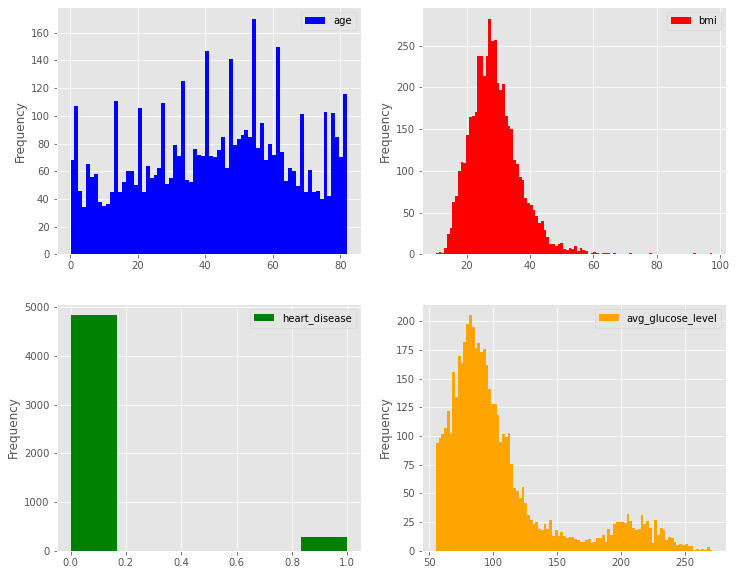

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

* We have good distribution for age 
* I think we have outliers in bmi 
* Avg glucose distribution is reasonable because the normal avg of blood in sugar is less than 140 , that may be not good this feature will not be helpful to know if diabetes have correlation between diabetes and strokes

<h1 style="font-family:Georgia;font-size:175%;text-align:center">Data Summary ( Check for missing values ) 
</h1>


In [ ]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

<h1 style="font-family:Georgia;font-size:175%;text-align:center">Data Visualization</h1>


<h1 style="font-family:Georgia;font-size:175%;text-align:left">Stroke Pie Chart</h1>


In [ ]:

labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

* Only 5% percent of people have Stroke ! 


<h1 style="font-family:Georgia;font-size:175%;text-align:left">Gender</h1>


In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='gender');

* There is about 1000 diffrence between Female and Male in the data 


<h1 style="font-family:Georgia;font-size:175%;text-align:left">Correlation with avg glucose level</h1>

* Visualize some features which maybe have correlation with avg glucose level



In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

* Avg glucose level is high with old people 
* BMI >40 have low avg glucose

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Stroke Or not Pair Grid</h1>

In [ ]:
sns.set(style="ticks");
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="stroke", palette=pal);
plt.title("stroke");

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Heatmap Correlation</h1>

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

* There is no correlation between stroke and BMI 

<h1 style="font-family:Georgia;font-size:175%;text-align:left">BMI Boxplot</h1>

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

* we have many outliers but before we fix this we must study BMI first 

<h1 style="color:white;background-color:black;font-family:Georgia;font-size:350%;text-align:center">BMI</h1>


* Body mass index is a value derived from the mass and height of a person



![](https://i.postimg.cc/kgd3LTBT/ae4498b42e31d75d05e764105a9e981a.jpg)


In [ ]:
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

In [ ]:
# mean with outliers 
print(bmi_outliers['stroke'].value_counts())

In [ ]:
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)
df["bmi"] = df["bmi"].fillna(28.4)

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Double Check for missing values</h1>

In [ ]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Stroke or not in Categorical Features</h1>

In [ ]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Stroke/Ever Married</h1>

In [ ]:
plt.figure(figsize=(10,5))
strok=df.loc[df['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno');

<h1 style="font-family:Arial;font-size:175%;text-align:center">That was expected, wasn't it 👀</h1> 

![](https://media.giphy.com/media/AIGA5rzzs4ygo/giphy.gif)

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Stroke/Work Type</h1>

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool');

* Private work exposes you to more stroke

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Stroke/Smoking Status</h1>

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='autumn');

* Being a smoker or a formerly smoker increases your risk of having a stroke

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Residence Type</h1>

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Greens');

* Residence Type has nothing to do with stroke, We cannot take it as a standard


<h1 style="font-family:Georgia;font-size:175%;text-align:left">Stroke/Heart Disease</h1>

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds');

* Most people who have had a stroke do not have any heart disease, but that does not prevent it being an influential factor 

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2');

* more than 25% of strok cases They had hypertension

<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Notes</h1>

* Avg glucose level is high with old people 
* BMI >40 have low avg glucose
* Being unmarried reduces your risk of a stroke
* Being a smoker or a formerly smoker increases your risk of having a stroke
* more than 25% of strok cases They had hypertension

<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Data preprocessing</h1>

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Encoding Categorical Features</h1>

In [ ]:
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

 
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])


In [ ]:
df

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Scaling The variance in Features</h1>

In [ ]:
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [ ]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Drop ID feature and check for nulls</h1>

In [ ]:
df=df.drop(columns='id',axis=1)

In [ ]:
df[df.isnull().any(axis=1)]

<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Classification Models</h1>

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Target & Features </h1>

In [ ]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Splitting </h1>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<h1 style="font-family:Georgia;font-size:175%;text-align:left">adaboost classification </h1>

In [ ]:
#create adaboost classification obj
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

#training via adaboost classficiation model
ab_clf.fit(X_train, y_train)
print("training....\n")

#make prediction using the test set
ab_pred_stroke= ab_clf.predict(X_train)
print('prediction: \n', ab_pred_stroke)

print('\nparms: \n', ab_clf.get_params)

#score
ab_clf_score = ab_clf.score(X_test, y_test)
print("\nmean accuracy: %.2f" % ab_clf.score(X_test, y_test))




<h1 style="font-family:Georgia;font-size:175%;text-align:left">XGboost </h1>

In [ ]:

xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(X_train, y_train)
#== 
#Score 
#== 
xgboost_score = xgboost.score(X_train, y_train)
xgboost_test = xgboost.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = xgboost.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',xgboost_score)
print('Testing Score \n',xgboost_test)

#=== 
#Confusion Matrix 
plt.figure(figsize=(14,5))

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");
print(accuracy_score(y_test,y_pred))

<h1 style="font-family:Georgia;font-size:175%;text-align:left">SVM </h1>

In [ ]:

svc = SVC(random_state=0)
svc.fit(X_train, y_train)
#== 
#Score 
#== 
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = svc.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(cm)

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Random Forest Classifier</h1>

In [ ]:
forest = RandomForestClassifier(n_estimators = 100)
#== 
forest.fit(X_train, y_train)
#== 
#Score 
#== 
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = forest.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Logistic Regression</h1>

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Testing Score \n',score)
logistic_score = model.score(X_train, y_train)
logistic_test = model.score(X_test, y_test)
#== 
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print(cm)

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Feature Importance using Logistic Regression</h1>

In [ ]:
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

In [ ]:
cols = list(df.columns)
cols.index('stroke')
#== 
#Delete target label 
#== 
del cols[5]
cols

In [ ]:
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

* Although BMI is considered an indicator for recognizing strokes, there are a large number of values ​​in the normal range and not a high rate that indicates a stroke.

<h1 style="font-family:Georgia;font-size:175%;text-align:left">MLP NN Classifier</h1>

In [ ]:
X = df.drop(['stroke','gender','bmi','Residence_type','work_type_Never_worked','smoking_status_Unknown'], axis=1).values 
#X = df.drop(['stroke','bmi'], axis=1).values 
y = df['stroke'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(1000,300, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
mlp=MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)
mlp.fit(X_train, y_train)
mlp_pred= mlp.predict(X_test)

mlp_score = mlp.score(X_train, y_train)
mlp_test = mlp.score(X_test, y_test)


y_pred =mlp.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',mlp_score)
print('Testing Score \n',mlp_test)
print(cm)

In [ ]:
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

<h1 style="background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Sensitivity & Specificity</h1>

![](https://i.postimg.cc/7L8qgPqB/main-qimg-4e6846605de48c4b372265b47e32ac15.jpg)


In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n')

- From the above statistics it is clear that the model is **more highly specific than sensitive**. The negative cases are predicted more accurately than the positives.